<center>
<h2>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h2>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2020</h3>
<h3>Predicción de la Calidad de Servicio</h3>
<h3>Análisis y Visualización</h3>
</center>
</left>
<h4>Mentor: Martín Hunziker</h4>
</left>

## Consigna para Informe de Análisis y Visualización

### 1. General

Se propone la **elaboración de un informe** que deberá entregarse en formato html o pdf y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.<br>
La estructura del mismo puede seguir un esquema de secciones como el siguiente: **Introducción - Presentación del Dataset - Variables más relevantes o de interés - Respuestas a preguntas disparadoras - Relaciones interesantes entre variables - Principales conclusiones y posibilidad de futuros aportes**. No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.


### 2. Análisis Estadístico de Variables

Se espera un análisis estadístico riguroso de variables que seleccionen por ser de su interés o porque crean que son relevantes (entre 2 y 4). Deberán responder preguntas como:
- Qué **tipo de variable** es cada una?
- Existen **outliers** en las variables seleccionadas?
- Hay **valores faltantes**? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?
- Cómo es la **distribución** de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?
- Cómo es la **distribución condicionada** a otra variable?

En caso de calcular estadísticos, explicar por qué lo hicieron y su significado. Utilizar los gráficos apropiados para mostrar el análisis realizado.<br>
Además:
- Cuáles son las **tres características con más datos faltantes**?
- Entre qué variables existe más **correlación**?
- Con cuáles variables están más **correlacionadas las clases**?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

### 3. Preguntas Disparadoras
A continuación se presenta una serie de ***preguntas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos que deberán responderlas de manera obligatoria. 

- Como se distribuye el consumo mensual del dataset? Y si observamos la distribución categoría tarifaria? y por alimentador
- Cuántos consumidores tienen un consumo mensual promedio superior a 100 kWh? Y más de 500 kWh?
- Cómo se correlacionan el consumo mensual y la categoria tarifaria? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- Cómo se distribuyen el consumo promedio, el FIC y el DIC y el Conjunto Electrico (CONJ), el Alimentador (CTMT), el Transformador de Dsitribucion (UNI_TR_D), la categoria tarifaria (GRU_TAR) y Localizacion(ARE_LOC)? Explorar las métricas o estadísticos dentro de cada y compararlas.


### 4 - Preguntas Opcionales

- Cuál es la conjunto electrico con menor cantidad de interrupciones (FEC = promedio ponderado por usuarios FIC)? Hay mucha disparidad entre la calidad de los diferentes conjuntos?
- Cuál es la conjunto electrico con menor duracion de interrupciones (DEC = promedio ponderado por usuarios DIC)? Hay mucha disparidad entre la calidad de los diferentes conjuntos?
- Cuál es la conjunto electrico con menor duracion unitaria (DEC/FEC) de interrupciones? Hay mucha disparidad entre la calidad de los diferentes conjuntos?


### Importaciones

In [39]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import fiona


In [40]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Lectura de datos

In [42]:
# Mostramos la lista de layers (capas) que tiene la base de datos

path_data = './Data/'
path_base = path_data+'ENF_6612_2018-12-31_M10_20190529-1610.gdb'

print(fiona.listlayers(path_base))


['BAR', 'BASE', 'BAY', 'BE', 'CTAT', 'CTMT', 'EP', 'EQCR', 'EQME', 'EQRE', 'EQSE', 'EQSIAT', 'EQTRD', 'EQTRM', 'EQTRS', 'EQTRSX', 'INDGER', 'PIP', 'PNT', 'PT', 'RAMLIG', 'SEGCON', 'ARAT', 'CONJ', 'PONNOT', 'SSDAT', 'SSDBT', 'SSDMT', 'SUB', 'UCAT', 'UCBT', 'UCMT', 'UGAT', 'UGBT', 'UGMT', 'UNCRAT', 'UNCRBT', 'UNCRMT', 'UNREAT', 'UNREMT', 'UNSEAT', 'UNSEBT', 'UNSEMT', 'UNTRD', 'UNTRS']


In [43]:
# Cargamos la layer (tabla geográfica) UCBT (Consumidores de Baja Tensión) una variable

_ds = gpd.read_file(path_base, driver='FileGDB', layer='UCBT')
_ds.head()


,DIST,PAC,PN_CON,UNI_TR_D,CTMT,UNI_TR_S,SUB,CONJ,MUN,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC,FIC,SEMRED,DESCR,ARE_LOC,geometry
0,6612,77407900752992400BT,27148349,26876319,27117483,27707534,27335513,15616,3303401,LUMIAR,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,343.0,325.0,265.0,193.0,153.0,122.0,150.0,150.0,143.0,139.0,166.0,168.0,31.59,9.0,1,,UB,POINT (-42.33951 -22.31468)
1,6612,77580298752558226BT,27156584,26876397,27117483,27707534,27335513,15616,3303401,AREA RURAL,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,115.0,133.0,110.0,94.0,112.0,111.0,112.0,126.0,118.0,135.0,100.0,83.0,2.32,3.0,1,,UB,POINT (-42.32204 -22.35359)
2,6612,77401136752897220BT,27161605,26876353,27117483,27707534,27335513,15616,3303401,S P DA SERRA,28610000,RE1,99999,RES-Tipo8,BC,BT,15,B1,AT,19/09/1997,6.0,0,96.0,107.0,99.0,99.0,126.0,108.0,113.0,104.0,92.0,99.0,110.0,94.0,38.01,10.0,1,,NU,POINT (-42.34000 -22.32328)
3,6612,75220000753924000BT,27145426,26877848,27117490,27707625,27335509,16069,3303401,SAO GERALDO,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,10/05/1990,6.0,0,216.0,202.0,199.0,179.0,231.0,204.0,217.0,205.0,184.0,220.0,197.0,197.0,1.81,3.0,1,,UB,POINT (-42.55320 -22.23394)
4,6612,75263876752971567BT,27138403,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,31/07/1988,6.0,0,223.0,128.0,116.0,221.0,114.0,72.0,73.0,163.0,146.0,114.0,139.0,227.0,1.55,3.0,1,,UB,POINT (-42.54744 -22.31984)


Las variables `DIC`= Duración de la Interrupción por consumidor [h] y `FIC`= Cantidad de Interrupciones por consumidor constituyen nuestros objetivos de predicción.

### Analisis Estadśitico

In [44]:
# Obtenemos la cantidad de filas y columnas del Dataset Original
_shape = _ds.shape
print("Nuestro Dataset original tiene", _shape[0], "filas y", _shape[1],"columnas.")

Nuestro Dataset original tiene 108346 filas y 40 columnas.


In [45]:
# Obtenemos los tipos de datos por columnas
data_types = _ds.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
DIST,int64
PAC,object
PN_CON,object
UNI_TR_D,object
CTMT,object
UNI_TR_S,object
SUB,object
CONJ,int64
MUN,object


Podemos ver que existen dos variables que no se corresponden al tipo de dato especificado:

    - DIST es el codigo de la distribuidora
    - LIV es un codigo binario
    - CONJ es un identificador categorico pero fue interpretado como numero
    - DAT_CON es una fecha pero se reconoce como texto


In [47]:
# Convertimos los identificadores de los conjuntos a strings
_ds['DIST'] = _ds.DIST.astype(str)
_ds['LIV'] = _ds.LIV.astype(str)
_ds['CONJ'] = _ds.CONJ.astype(str)
_ds['DAT_CON'] = pd.to_datetime(_ds.DAT_CON, dayfirst=True, format='%d/%m/%Y')

In [59]:
# Clasificar columnas en categoricas y numericas
cat_ft = _ds.columns[_ds.dtypes == 'object']
num_ft = _ds.columns[_ds.dtypes != 'object']

In [52]:
# Agrupando Variables

_ds['ENE_MED'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].mean(axis=1)
_ds['ENE_STD'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].std(axis=1)
_ds['ENE_MAX'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].max(axis=1)

## 3 - Distribucion estadistica

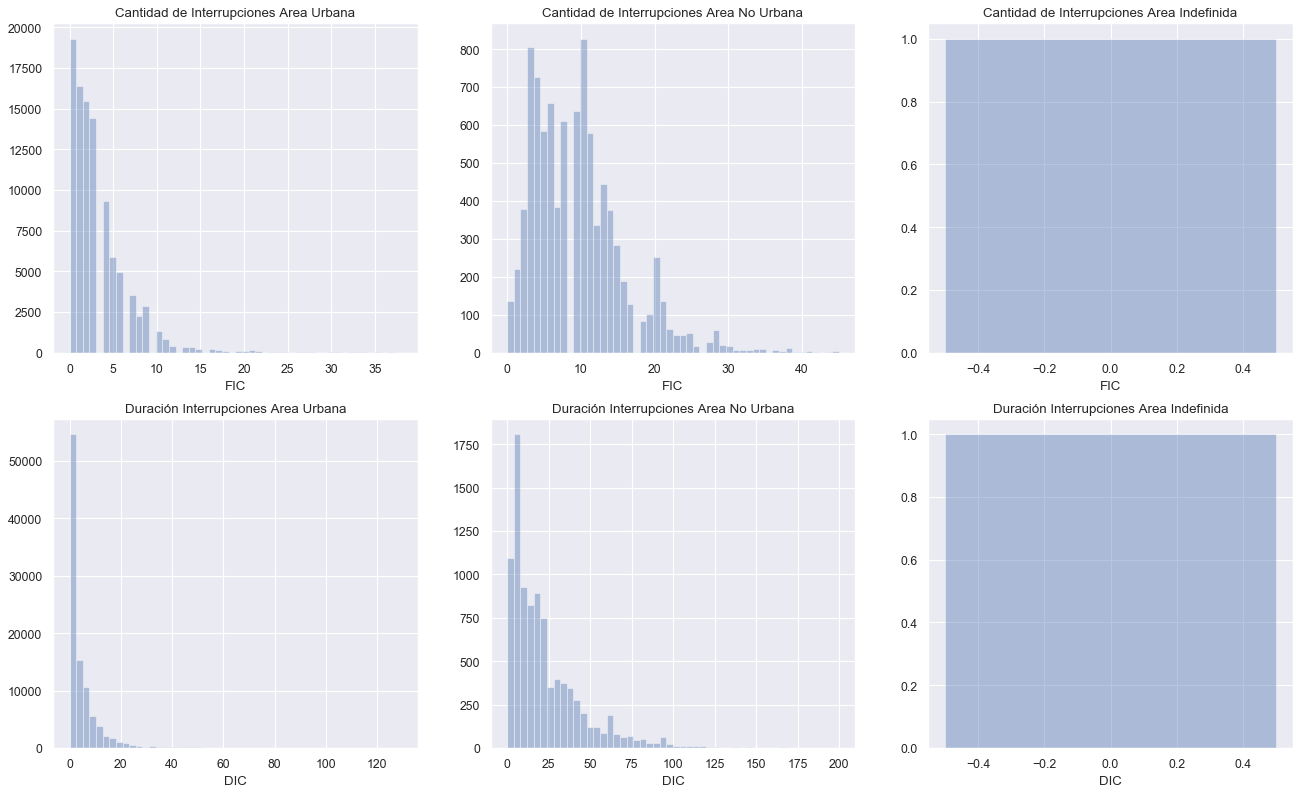

In [53]:
# Analizamos la distribución de los indicadores
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(20, 12), dpi=80)
       
subplot(2,3,1)
title('Cantidad de Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['FIC'],kde=False)
subplot(2,3,2)
title('Cantidad de Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['FIC'],kde=False)
subplot(2,3,3)
title('Cantidad de Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['FIC'],kde=False)
subplot(2,3,4)
title('Duración Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['DIC'],kde=False)
subplot(2,3,5)
title('Duración Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['DIC'],kde=False)
subplot(2,3,6)
title('Duración Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['DIC'],kde=False)


In [54]:
# Observamos que existe solo 1 usuario con la clasificación Urbana -  no Urbana no definida. Verificamos
_ds.groupby('ARE_LOC').count()['DIST']

ARE_LOC
0         1
NU     9308
UB    99037
Name: DIST, dtype: int64

### Gráficos de interacción entre variables

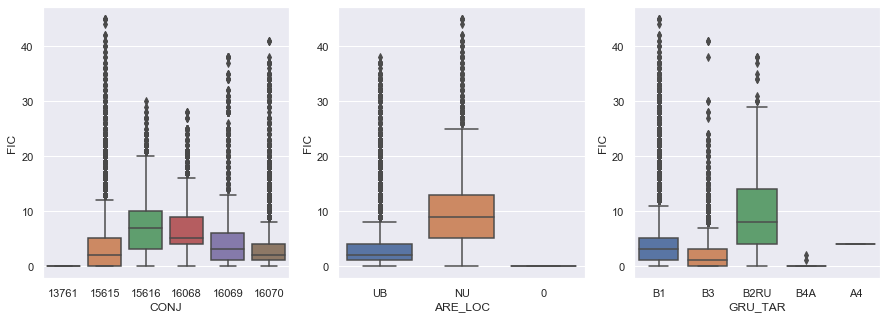

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x= 'CONJ', y='FIC', data=_ds)

plt.subplot(1,3,2)
sns.boxplot(x= 'ARE_LOC', y='FIC', data=_ds)

plt.subplot(1,3,3)
sns.boxplot(x= 'GRU_TAR', y='FIC', data=_ds)

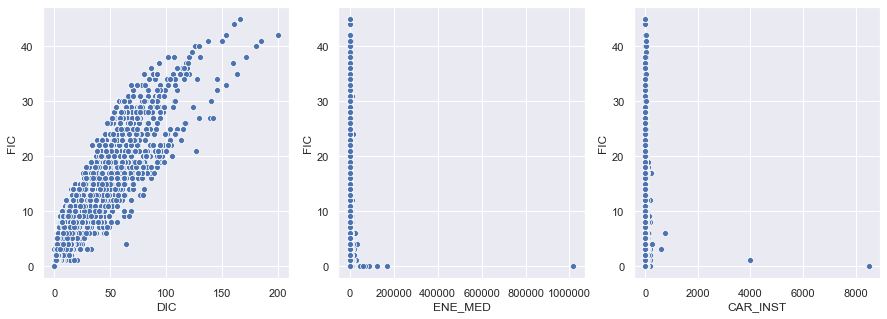

In [57]:
# Para relacionar variables numericas podemos usar un ScatterPlot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x= 'DIC', y='FIC', data=_ds)

plt.subplot(1,3,2)
sns.scatterplot(x= 'ENE_MED', y='FIC', data=_ds)

plt.subplot(1,3,3)
sns.scatterplot(x= 'CAR_INST', y='FIC', data=_ds)

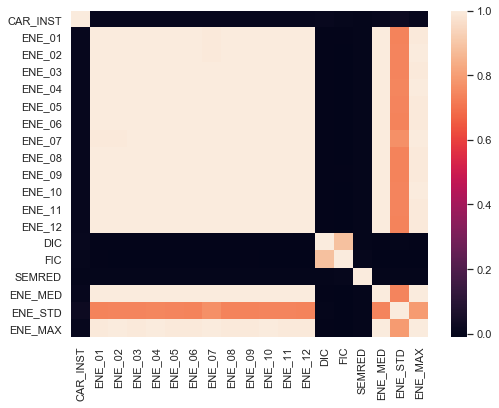

In [60]:
# Una manera rapida de verificar la relacion entre variables es calcular la correlacion. Que puede ser graficada en un heatmap.
plt.figure(figsize=(8,6))
sns.heatmap(_ds[num_ft].corr())